## Part-A

• DOMAIN: Medical 

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions.  University has an internal AI team. 

Due  to  confidentiality  the  patient’s  details  and  the  conditions  are  masked  by   the  client  by  providing  different  datasets  to  the  AI  team  for developing a AIML model which can predict the  condition of the patient depending on the received test results. 

• DATA  DESCRIPTION:  The  data  consists  of  biomechanics  features  of  the  patients  according  to  their  current   conditions.  Each  patient  is represented in the data set by six biomechanics attributes derived from the shape and  orientation of the condition to their body part. 

• PROJECT  OBJECTIVE:  To  Demonstrate  the  ability  to  fetch,  process  and  leverage  data  to  generate  useful  predictions   by  training  Supervised 
Learning algorithms

1. Data Understanding: 

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_Normal=pd.read_csv('part1_Normal.csv')
df_TypeH=pd.read_csv('part1_Type_H.csv')
df_TypeS=pd.read_csv('part1_Type_S.csv')

B. Print Shape and columns of all the 3 DataFrames.

In [35]:
print(f'Shape of Normal dataset is {df_Normal.shape} and their columns are as follows \n {df_Normal.columns}\n')
print(f'Shape of Type_H dataset is {df_TypeH.shape} and their columns are as follows \n {df_TypeH.columns}\n')
print(f'Shape of Type_S dataset is {df_TypeS.shape} and their columns are as follows \n {df_TypeS.columns}\n')

Shape of Normal dataset is (100, 7) and their columns are as follows 
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape of Type_H dataset is (60, 7) and their columns are as follows 
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape of Type_S dataset is (150, 7) and their columns are as follows 
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')



C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

In [36]:
var=df_Normal.columns.equals(df_TypeH.columns) and df_Normal.columns.equals(df_TypeS.columns)
if var:
    print('All 3 dataframes have same columns')
else:
    print('All 3 dataframes have different columns')

All 3 dataframes have same columns


All three datasets seem to be having same column names and they are separated as three different datasets based on the class which is normal, type_s, type_h. There is a complexity in the datasets that the pattern of the attribute class are different like they have different case. We have to clean them.

D. Print DataTypes of all the 3 DataFrames. 

In [37]:
df_Normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [38]:
df_TypeH.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [39]:
df_TypeS.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

All datasets seem to have float64 as datatype except the Class attribute which is fine.

E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames.

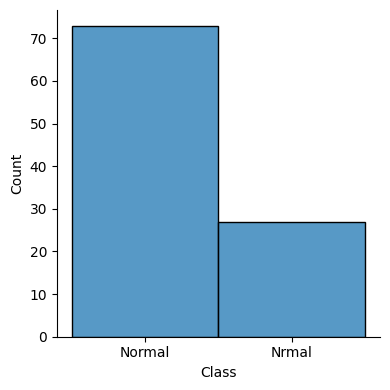

In [40]:
sns.displot(data=df_Normal['Class'],height=4)

We can see that there is some text mismatch in the data 'Normal', 'Nrmal'

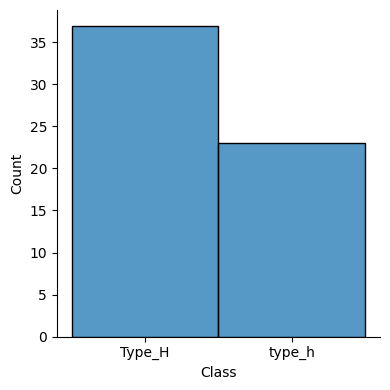

In [41]:
sns.displot(data=df_TypeH['Class'],height=4)

We can see that there is some text mismatch in the data 'Type_H', 'type_h'

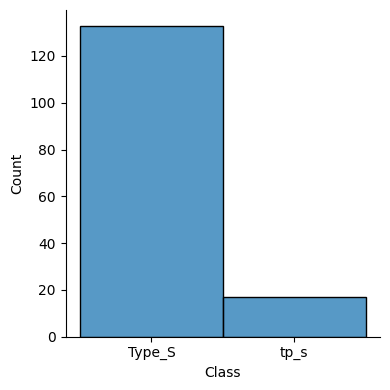

In [42]:
sns.displot(data=df_TypeS['Class'], height=4)

We can see that there is some text mismatch in the data 'Type_S', 'tp_s'

In [43]:
df_TypeH.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

2. Data Preparation and Exploration:

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [44]:
Normal_col=df_Normal['Class'].unique()
df_Normal.replace(Normal_col, inplace=True, value='normal')
df_Normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [45]:
TypeH_col=df_TypeH['Class'].unique()
df_TypeH.replace(TypeH_col, inplace=True, value='typeH')
df_TypeH.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,typeH
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,typeH
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,typeH
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,typeH
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,typeH


In [46]:
TypeS_col=df_TypeS['Class'].unique()
df_TypeS.replace(TypeS_col, inplace=True, value='typeS')
df_TypeS.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,typeS
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,typeS
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,typeS
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,typeS
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,typeS


B. Combine all the 3 DataFrames to form a single DataFrame

In [47]:
merged_df=pd.concat([df_Normal,df_TypeH,df_TypeS], ignore_index=True)
print(merged_df.loc[merged_df['Class']=='normal'].head(1))
print(merged_df.loc[merged_df['Class']=='typeS'].head(1))
print(merged_df.loc[merged_df['Class']=='typeH'].head(1))
merged_df.shape

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  normal
     P_incidence     P_tilt    L_angle    S_slope   P_radius   S_Degree  Class
160    74.377678  32.053104  78.772013  42.324573  143.56069  56.125906  typeS
     P_incidence     P_tilt    L_angle    S_slope   P_radius  S_Degree  Class
100    63.027817  22.552586  39.609117  40.475232  98.672917   -0.2544  typeH


(310, 7)

C. Print 5 random samples of this DataFrame

In [48]:
merged_df.sample(5).sort_index()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
69,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862,normal
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,normal
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,normal
140,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,typeH
248,65.755679,9.832874,50.822895,55.922805,104.394959,39.307212,typeS


D. Print Feature-wise percentage of Null values.

In [49]:
null_per=(merged_df.isnull().sum()/len(merged_df))*100
print(null_per)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


E. Check 5-point summary of the new DataFrame.

In [50]:
merged_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


3. Data Analysis:

A. Visualize a heatmap to understand correlation between all features

<Axes: >

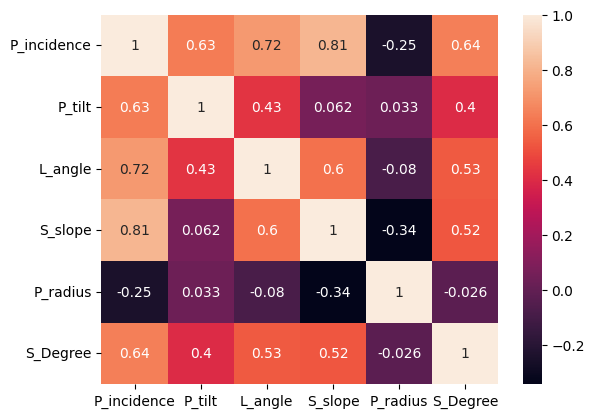

In [51]:
merged_df_numcol=merged_df[merged_df.columns[0:-1]]
sns.heatmap(merged_df_numcol.corr(), annot=True)

B. Share insights on correlation. 

A. Features having stronger correlation with correlation value. 

    -S_slope and P_incidence looke to have strong correlation of 0.81 and L_angle and P_incidence also has a strong correlation of 0.72

B. Features having weaker correlation with correlation value.

    -S_slope and P_radius has the weakest correlation with -0.34 and P_incidence and P_radius with -0.25

C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

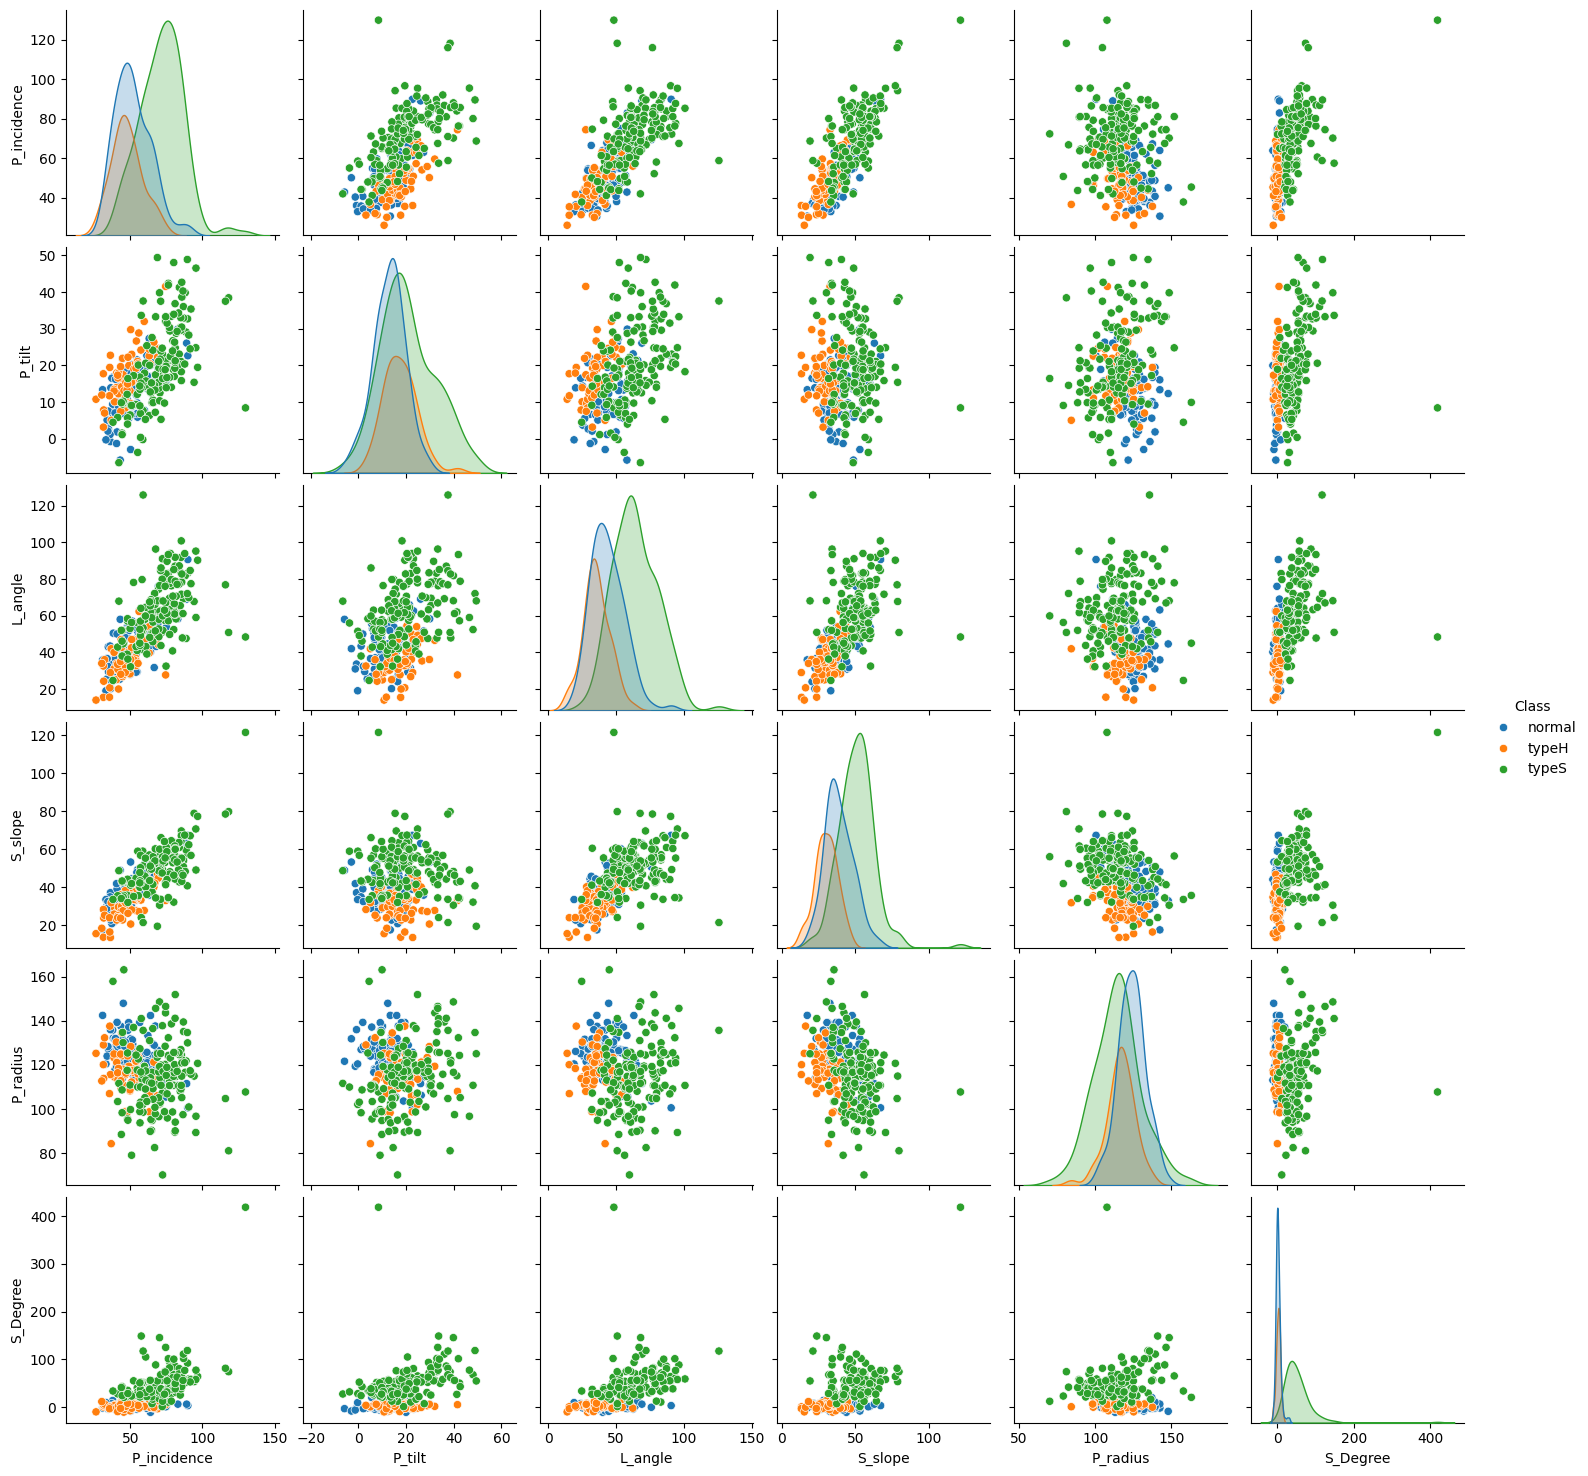

In [52]:
sns.pairplot(merged_df, hue='Class')

Like we saw in heat map, we can confirm that L_angle and P_incidence and S_slope and P_incidence are strongly correlated. ANd also P_radius data looks normally distributed. And P_tilt of class type_s looks skewed to the right indicating presence of outliers.

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

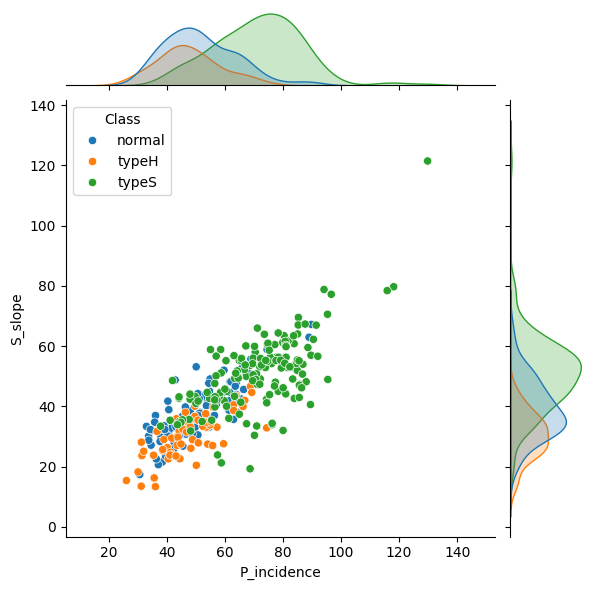

In [53]:
sns.jointplot(x=merged_df['P_incidence'], y=merged_df['S_slope'], hue=merged_df['Class'])

Majority of type_S S_slope values lies around 50 and type_s P_incidence lies around 80 and few outliers are found hence it looks skewed to the left. And in case type_H and normal classes, the majority of the values for s_slope are around 35 and 30 respectively and P_incidence values for both type_H and normal are majorly around 40-45 and both are skewed to the right.

E. Visualize a boxplot to check distribution of the features and share insights.

In [54]:
merged_df['S_Degree'].loc[merged_df['S_Degree']>200]

215    418.543082
Name: S_Degree, dtype: float64

We are seeing an abnormal value in S_degree which is 418.54 in row 215, we will remove and replace with mean and then plot a boxplot

In [55]:
merged_df_copy=merged_df.copy(deep=True)
merged_df_copy.at[215,'S_Degree']=merged_df_copy['S_Degree'].mean()

In [56]:
merged_df_copy['S_Degree'].loc[merged_df_copy['S_Degree']>200]

Series([], Name: S_Degree, dtype: float64)

<Axes: >

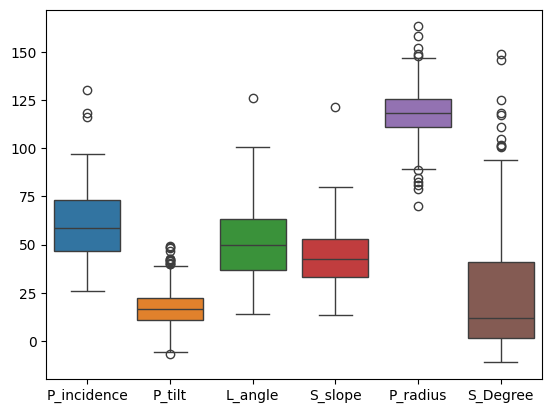

In [57]:
sns.boxplot(merged_df_copy)

S_Degree  is highly skewed to the right, that might be because of outliers. ANd all the other three attributes are looking like a symmetrical distibution atleast seeing from the boxplot.

4. Model Building:

A. Split data into X and Y.

In [58]:
df_x=merged_df_copy.drop(columns=['Class'])
df_y=merged_df_copy['Class']


B. Split data into train and test with 80:20 proportion. 

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=42)
print('Train and Test size of the data after splitting:', X_train.shape, X_test.shape)

Train and Test size of the data after splitting: (248, 6) (62, 6)


C. Train a Supervised Learning Classification base model using KNN classifier.

In [60]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Model with normalized data
Mod2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
Mod2.fit(X_train_normalized, y_train)
predicted1=Mod2.predict(X_train_normalized)
predicted2 = Mod2.predict(X_test_normalized)
print("Accuracy with normalization (train data):", Mod2.score(X_train_normalized, y_train))
print("Accuracy with normalization (test data):", Mod2.score(X_test_normalized, y_test))
old_precision = precision_score(y_test, predicted2, average='weighted')
old_accuracy = Mod2.score(X_test_normalized, y_test)
report_normalized_train=classification_report(y_train, predicted1)
report_normalized = classification_report(y_test, predicted2)

Accuracy with normalization (train data): 1.0
Accuracy with normalization (test data): 0.8387096774193549


D. Print all the possible performance metrics for both train and test data.

In [61]:
report_normalized_train=classification_report(y_train, predicted1)
print("Classificaiton report with normalization(Training data):\n", report_normalized_train)
report_normalized = classification_report(y_test, predicted2)
print("Classification Report with normalization(Test data):\n", report_normalized)

Classificaiton report with normalization(Training data):
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        78
       typeH       1.00      1.00      1.00        50
       typeS       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Classification Report with normalization(Test data):
               precision    recall  f1-score   support

      normal       0.77      0.77      0.77        22
       typeH       0.64      0.70      0.67        10
       typeS       0.97      0.93      0.95        30

    accuracy                           0.84        62
   macro avg       0.79      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



5. Performance Improvement:

A. Experiment with various parameters to improve performance of the base model.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric' : ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_normalized, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
predicted_test=best_model.predict(X_test_normalized)
imp_precision = precision_score(y_test, predicted_test, average='weighted')
test_accuracy = best_model.score(X_test_normalized, y_test)
print("Test accuracy with best model:", test_accuracy)
print(classification_report(y_test, predicted_test))


Best hyperparameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best accuracy: 0.8226938775510204
Test accuracy with best model: 0.8548387096774194
              precision    recall  f1-score   support

      normal       0.78      0.82      0.80        22
       typeH       0.70      0.70      0.70        10
       typeS       0.97      0.93      0.95        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62



B. Clearly showcase improvement in performance achieved. 

Though we can see that there is no significant improvement achieved with modifying the hyperparameters by using gridsearch cross validation technique, we are able to get some amount of improvement.

In [63]:
print(f'Percentage imporvement in Accuracy: {((test_accuracy-old_accuracy)/old_accuracy)*100:.2f}%')
print(f'Percentage improvement in precision: {((imp_precision-old_precision)/old_precision)*100:.2f}%')

Percentage imporvement in Accuracy: 1.92%
Percentage improvement in precision: 1.63%


C. Clearly state which parameters contributed most to improve model performance. 

From the above output of gridsearchcv, we can see that the

Best hyperparameters are: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

## PART B:

• DOMAIN: Banking, Marketing

• CONTEXT:  A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee  majority of them are liability  customers  (depositors)  vs  borrowers  (asset  customers).  The  bank  is interested in expanding the borrowers  base  rapidly  to  bring  in  more 
business  via  loan  interests.  A  campaign  that  the  bank  ran  in  last  quarter  showed  an   average  single  digit  conversion  rate.  Digital  transformation being  the  core  strength  of  the  business  strategy,  marketing   department  wants  to  devise  effective  campaigns  with  better  target  marketing  to increase the conversion ratio to double digit  with same budget as per last campaign.  

• DATA DICTIONARY: 
1. ID: Customer ID  
2. Age: Customer’s approximate age.  
3. CustomerSince: Customer of the bank since. [unit is masked]  
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]  
5. ZipCode: Customer’s zip code.  
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.  
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]  
8. Level: A level associated to the customer which is masked by the bank as an IP.  
9. Mortgage: Customer’s mortgage. [unit is masked]  
10. Security: Customer’s security asset with the bank. [unit is masked]  
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]  
12. InternetBanking: if the customer uses internet banking.  
13. CreditCard: if the customer uses bank’s credit card.  
14. LoanOnCard: if the customer has a loan on credit card.
  
• PROJECT  OBJECTIVE:  Build  a  Machine  Learning  model  to  perform  focused  marketing  by  predicting  the  potential  customers  who  will  convert 
using the historical dataset

1. Data Understanding and Preparation:

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. 

In [64]:
df_1=pd.read_csv('Part2_Data1.csv')
df_2=pd.read_csv('Part2_Data2.csv')

In [65]:
df_1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [66]:
df_2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


B. Print shape and Column Names and DataTypes of both the Dataframes. 

In [67]:
print(df_1.shape,'\n\n' , df_1.columns,'\n\n' ,df_1.dtypes)

(5000, 8) 

 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object') 

 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [68]:
print(df_2.shape,'\n\n' , df_2.columns,'\n\n' ,df_2.dtypes)

(5000, 7) 

 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object') 

 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [69]:
df=df_1.merge(df_2, on='ID')
df.shape, df.columns

((5000, 14),
 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
        'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
        'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
       dtype='object'))

In [70]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [71]:
df.tail()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0.0


D. Change Datatype of below features to ‘Object’. ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [72]:
dum_col=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
df[dum_col].dtypes

CreditCard             int64
InternetBanking        int64
FixedDepositAccount    int64
Security               int64
Level                  int64
HiddenScore            int64
dtype: object

In [73]:
df[dum_col] = df[dum_col].astype('object')
df[dum_col].dtypes

CreditCard             object
InternetBanking        object
FixedDepositAccount    object
Security               object
Level                  object
HiddenScore            object
dtype: object

2. Data Exploration and Analysis: 

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

<Axes: xlabel='LoanOnCard', ylabel='Count'>

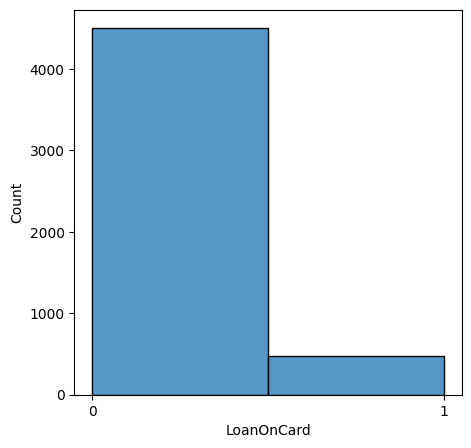

In [74]:
plt.figure(figsize=(5,5))
plt.xticks([0,1])
sns.histplot(df['LoanOnCard'], bins=2)

In [75]:
wC_wL=0
wC_woL=0
woC_wL=0
woC_woL=0
for _,i in df.iterrows():
    if(i['CreditCard']==0)and(i['LoanOnCard']==0):
        woC_woL+=1
    if(i['CreditCard']==0)and(i['LoanOnCard']==1):
        woC_wL+=1
    if(i['CreditCard']==1)and(i['LoanOnCard']==0):
        wC_woL+=1
    if(i['CreditCard']==1)and(i['LoanOnCard']==1):
        wC_wL+=1
print(f'With credit card and with Loan {wC_wL}')
print(f'With credit card but without  Loan {wC_woL}')
print(f'Without credit card but with Loan {woC_wL}')
print(f'Without  credit card and without Loan {woC_woL}')

With credit card and with Loan 143
With credit card but without  Loan 1323
Without credit card but with Loan 337
Without  credit card and without Loan 3177


The above graph clearly shows that very minimal number of customers counting to 480 have loans on credit card. 

The customers who has credit card and does not have loan sum upto 1323.

The customers who has credit card and has loan sum up tp 143

CUstomers who don't have credit card but has loan sum up to 337

Customers who do not have credit card and also do not have loan sum up to 3177


B. Check the percentage of missing values and impute if required. 

In [76]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

There are 20 missing values in 'LoanOnCard'

In [77]:
df.isnull().mean()*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [78]:
df['LoanOnCard'] = df['LoanOnCard'].fillna(0)
df['LoanOnCard'] = df['LoanOnCard'].astype('int64')

C. Check for unexpected values in each categorical variable and impute with best suitable value. 

In [79]:
for i in df.columns:
    print(f'{i} {df[i].unique().min()}')

ID 1
Age 23
CustomerSince -3
HighestSpend 8
ZipCode 9307
HiddenScore 1
MonthlyAverageSpend 0.0
Level 1
Mortgage 0
Security 0
FixedDepositAccount 0
InternetBanking 0
CreditCard 0
LoanOnCard 0


There are some negative values in 'CustomerSince' column which we will make impute as 0 as it doesnt make sense.

In [80]:
df[df['CustomerSince']<0]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,1,0
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,1,0,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,1,0,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,1,0,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,1,0,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,1,0,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,1,0
583,584,24,-1,38,95045,2,1.70,2,0,0,0,1,0,0
597,598,24,-2,125,92835,2,7.20,1,0,1,0,0,1,0


In [81]:
df.loc[df['CustomerSince'] < 0, 'CustomerSince'] = 0

3. Data Preparation and model building: 

A. Split data into X and Y.

In [82]:
df.drop(['ID', 'ZipCode'],  inplace=True, axis=1)
df.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [83]:
df.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [84]:
df_X=df[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard']]
df_Y=df['LoanOnCard']
x_train, x_test, y_train, y_test=train_test_split(df_X, df_Y, test_size=0.25, random_state=42)

C. Train a Supervised Learning Classification base model - Logistic Regression. 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1116
           1       0.85      0.66      0.74       134

    accuracy                           0.95      1250
   macro avg       0.91      0.82      0.86      1250
weighted avg       0.95      0.95      0.95      1250



The accuracy we got with linaer model is very high with 95.12%

E. Balance the data using the right balancing technique.

i. Check distribution of the target variable 

ii. Say output is class A : 20% and class B : 80% 

iii. Here you need to balance the target variable as 50:50. 

iv. Try appropriate method to achieve the same.

In [86]:
target_dist = df['LoanOnCard'].value_counts(normalize=True)
print(target_dist)

LoanOnCard
0    0.904
1    0.096
Name: proportion, dtype: float64


class 0 seems to be 90% and class 1 seems to be 10%

In [87]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

target_distribution_resampled = pd.Series(y_train_resampled).value_counts(normalize=True)
print(target_distribution_resampled)

LoanOnCard
0    0.5
1    0.5
Name: proportion, dtype: float64


F. Again train the same previous model on balanced data.

In [88]:
from sklearn.metrics import recall_score, f1_score

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

logreg_balanced = LogisticRegression(max_iter=1000)

logreg_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = logreg_balanced.predict(X_test_balanced)

accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
report = classification_report(y_test_balanced, y_pred_balanced)

print(f"Accuracy: {accuracy_balanced}")
print("Classification Report:")
print(report)


Accuracy: 0.8869309838472834
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       696
           1       0.89      0.88      0.88       666

    accuracy                           0.89      1362
   macro avg       0.89      0.89      0.89      1362
weighted avg       0.89      0.89      0.89      1362



G. Print evaluation metrics and clearly share differences observed. 

Before Balancing:

Accuracy: 0.9512

Precision (Class 0): 0.96

Recall (Class 0): 0.99

F1-score (Class 0): 0.97

Precision (Class 1): 0.85

Recall (Class 1): 0.66

F1-score (Class 1): 0.74

After Balancing:

Accuracy: 0.8869

Precision (Class 0): 0.89

Recall (Class 0): 0.89

F1-score (Class 0): 0.89

Precision (Class 1): 0.89

Recall (Class 1): 0.88

F1-score (Class 1): 0.88

Differences Observed:

1. Accuracy decreased slightly after balancing the data.

2. Precision, recall, and F1-score for both classes improved after balancing. This indicates a better balance between the model's ability to correctly identify both classes (0 and 1).

3. The macro-average and weighted-average metrics remained relatively stable, indicating that the overall model performance did not degrade significantly after balancing the data.

Overall, balancing the data improved the model's ability to generalize to both classes, resulting in more balanced precision, recall, and F1-scores for each class.

4. Performance Improvement:

A. Train a base model each for SVM, KNN.

SVM

In [89]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced, y_train_balanced, test_size=0.25, random_state=1)

svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Model Classification Report:\n", svm_classification_report)


SVM Model Accuracy: 0.9060205580029369
SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       694
           1       0.90      0.91      0.90       668

    accuracy                           0.91      1362
   macro avg       0.91      0.91      0.91      1362
weighted avg       0.91      0.91      0.91      1362



KNN:

In [90]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_balanced, y_train_balanced)

knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)
print("KNN Model Accuracy:", knn_accuracy)
print("KNN Model Classification Report:\n", knn_classification_report)


KNN Model Accuracy: 0.9552129221732746
KNN Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       694
           1       0.92      1.00      0.96       668

    accuracy                           0.96      1362
   macro avg       0.96      0.96      0.96      1362
weighted avg       0.96      0.96      0.96      1362



B. Tune parameters for each of the models wherever required and finalize a model.

Since Knn was giving greater accuracy with a good f1 score, we will try to improve knn to give even more better values by using the hyperparameters.

In [91]:
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric' : ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
predicted_test=best_model.predict(X_test)
imp_precision = precision_score(y_test, predicted_test, average='weighted')
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best model:", test_accuracy)
print(classification_report(y_test, predicted_test))


Best hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best accuracy: 0.960153831896951
Test accuracy with best model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       694
           1       1.00      1.00      1.00       668

    accuracy                           1.00      1362
   macro avg       1.00      1.00      1.00      1362
weighted avg       1.00      1.00      1.00      1362



We get better accuracy of 96% using Knn classifier.

C. Print evaluation metrics for final model.

In [92]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       694
           1       1.00      1.00      1.00       668

    accuracy                           1.00      1362
   macro avg       1.00      1.00      1.00      1362
weighted avg       1.00      1.00      1.00      1362



D. Share improvement achieved from base model to final model.

If we use these parameters we are able to get 100% accuracy {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

We are able to improve the accuracy by 4.1% by making modification to the hyper parameters